## Bibliotecas Utilizadas


In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Definições do Sistema

In [ ]:
def hs_(s,X):
    W = s
    dot = np.dot(X,W)
    D = np.tanh(dot)
    return D

def Hs(s,X):
    out = np.zeros((3,))
    '''Produto Interno entre pesos e Entradas'''
    # dot = np.dot(s,X)
    # sum = 1-np.tanh(dot)**2
    sum = 1- hs_(s,X)**2
    sum = 1- np.tanh(s[0]*X[0] + s[1]*X[1]+s[2]*X[2])**2
    
    out[0] = X[0] * sum
    out[1] = X[1] * sum
    out[2] = X[2] * sum
    return out

error [[ 0.24054402]
 [-0.24054402]
 [-0.24054402]
 [ 0.37324461]]
h [[-0.24054402]
 [ 0.24054402]
 [ 0.24054402]
 [ 0.62675539]]


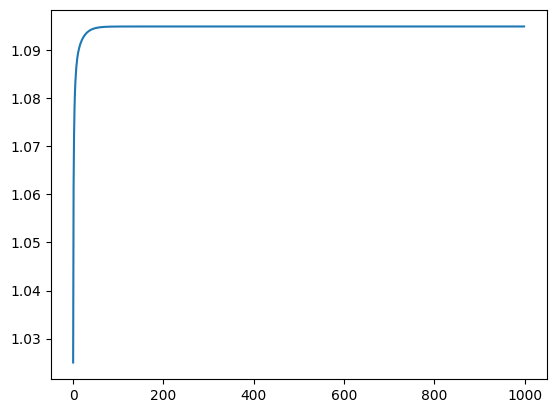

In [ ]:

D = np.array([[0, 0, 0, 1]]).T
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

W = 2*np.random.random((3,1)) -1 

# W = np.array([[-0.47399, 0.73467, 1.5124]]).T

pass
'''Initial Conditions'''
N = 1000
cost = np.zeros((N,))
t = np.arange(N)


ns = W.shape[0]
nd = D.shape[0]
s = W
P = np.eye(ns)
R = np.eye(nd)
Q = 0.01*np.eye(ns)

H = np.zeros((nd, ns))
h = np.zeros((nd, 1))
for i in range(N):
    '''Predict'''
    sp = s
    Pp = P + Q
    
    '''Update'''
    # Torna z como vector [0,0,0]
    z = D 

    for k in range(nd):
        H[k,:] = Hs(s,X[k,:])
        h[k,:] = hs_(s,X[k,:])
    error = z - h 

    S = np.matmul(H, np.matmul(P,H.T)) + R

    '''Calculo Ganho de Kalman(K)'''
    inv_S = inv(S)
    K = np.matmul(Pp, np.matmul(H.T, inv_S))


    s = sp + np.matmul(K, error)
    P = np.matmul(np.eye(ns) - np.matmul(K,H), Pp)
    cost[i] = np.sum(np.abs(error))
print("error",error)
print('h', h)
plt.figure()
plt.plot(t, cost)